# Exploratory Data Analysis using Python

Exploratory Data Analysis or (EDA) is understanding the data sets by summarizing their main characteristics often plotting them visually. This step is very important especially when we arrive at modeling the data in order to apply Machine learning. Plotting in EDA consists of Histograms, Box plot, Scatter plot and many more. It often takes much time to explore the data. Through the process of EDA, we can ask to define the problem statement or definition on our data set which is very important.

# Task-5
### Perform ‘Exploratory Data Analysis’ on the provided dataset ‘SampleSuperstore’.
## Steps:
- Import Libraries
- Read the Data
- Data Preprocessing
- Exploratory Data Analysis
- Derived insights from the given data


**Let's get started!**

### Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns  
import matplotlib.pyplot as plt  
%matplotlib inline

### Check out the data

In [3]:
Store_data = pd.read_csv("SampleSuperstore.csv")
print("Data imported successfully")

Data imported successfully


In [4]:
Store_data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
Store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
Store_data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Insights:
**there is lot of difference between 75% and max and also lot of difference between mean and medians in sales and Profit**

### Data Preprocessing

In [7]:
# checking for null values...
Store_data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

### Insights:
**There is no null values in our data..**

### Exploratory Data Analysis

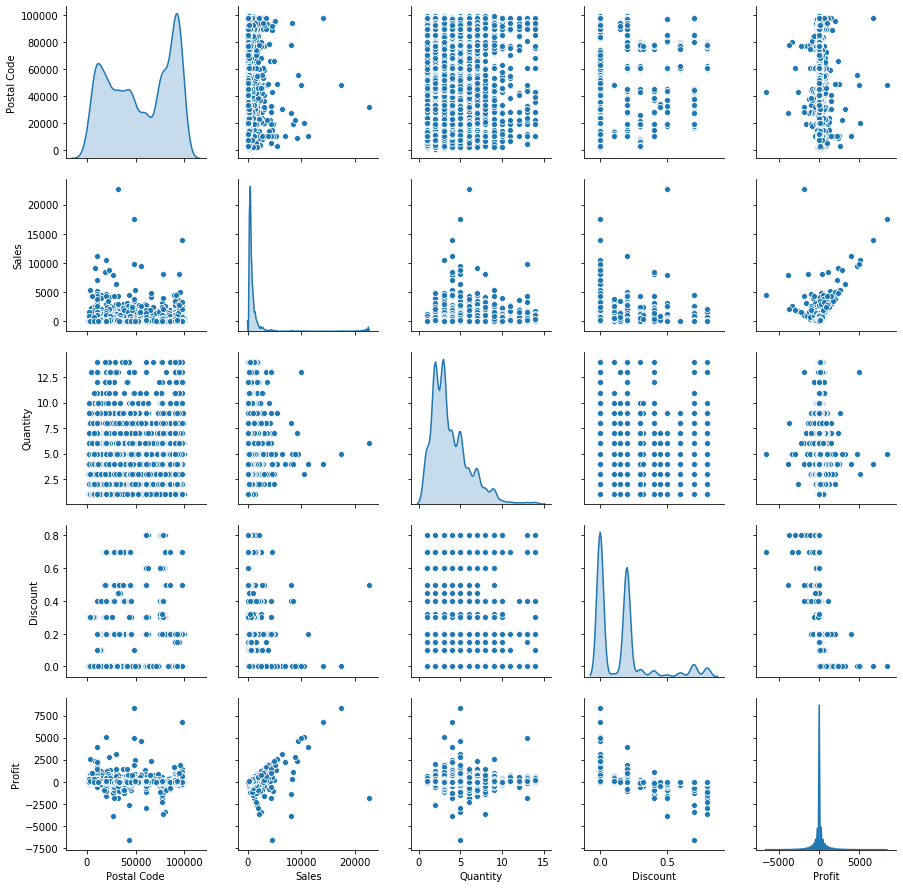

In [8]:
# Let's now visualise our data using seaborn. We'll first make a pairplot of all the variables...
sns.pairplot(Store_data,diag_kind="kde")

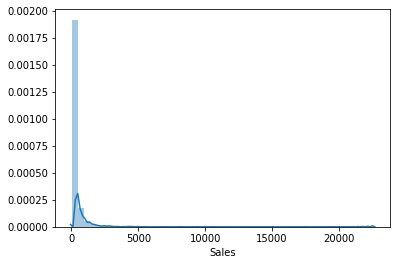

In [9]:
sns.distplot(Store_data["Sales"])

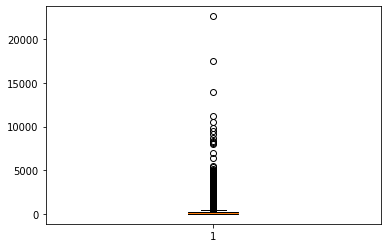

In [10]:
plt.boxplot(Store_data["Sales"])
plt.show()

### Insights:
**Lot of outlers in Sales column**

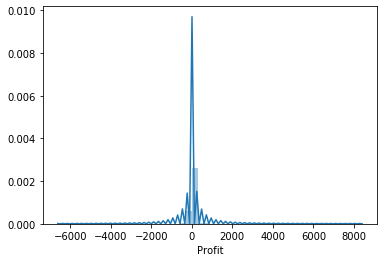

In [11]:
sns.distplot(Store_data["Profit"])

### Insights:
**It's seems to be a normal distribution but lot of skewness in Profit column**

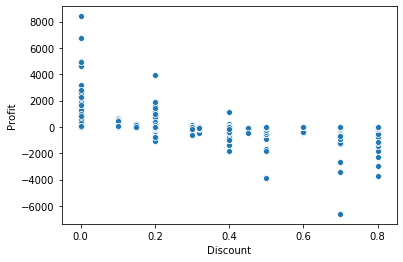

In [12]:
sns.scatterplot(x="Discount",y="Profit",data=Store_data)

### Insights:
**As Discount increases the Profit decreases**

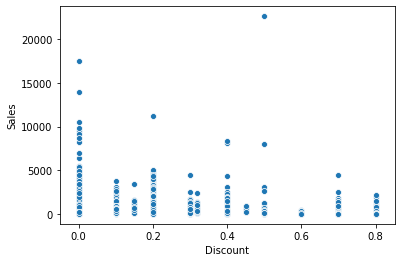

In [13]:
sns.scatterplot(x="Discount",y="Sales",data=Store_data)

### Insights:
**As Discount increases the Sales also decreases**

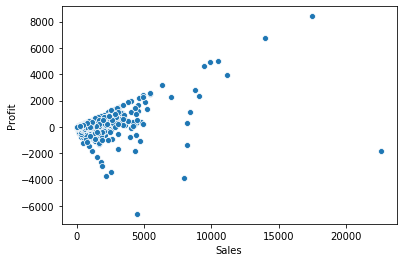

In [14]:
sns.scatterplot(x="Sales",y="Profit",data=Store_data)

### Insights:
**Here the Sales are increasing but profits are Negative in some time which doesn't have any sence**

In [15]:
Store_data["Country"].value_counts()

United States    9994
Name: Country, dtype: int64

In [16]:
# country is common for all entries let's remove it
Store_data=Store_data.drop("Country",axis=1)

In [17]:
Store_data.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [18]:
Store_data["Ship Mode"].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

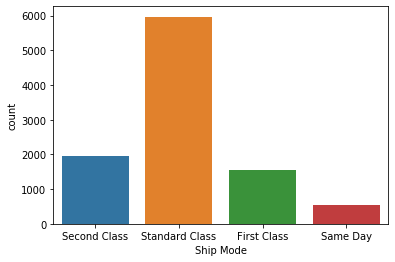

In [19]:
sns.countplot(x="Ship Mode",data=Store_data)

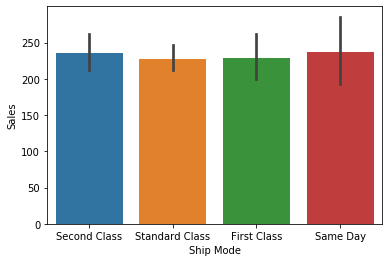

In [20]:
sns.barplot(x='Ship Mode',y='Sales',data=Store_data)

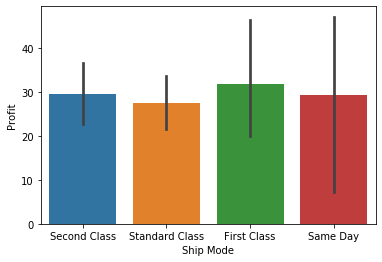

In [21]:
sns.barplot(x='Ship Mode',y='Profit',data=Store_data)

### Insights:
**Ship mode doesn't have impact on Sales and profit**

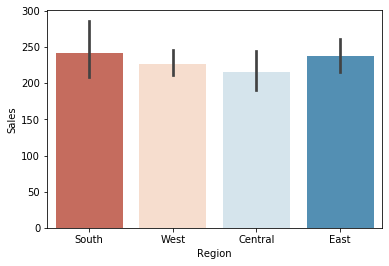

In [22]:
sns.barplot(x='Region',y='Sales',data=Store_data,palette="RdBu")

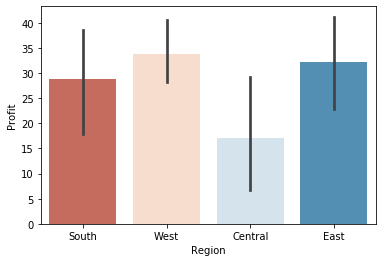

In [23]:
sns.barplot(x='Region',y='Profit',data=Store_data,palette="RdBu")

### Insights:
**Sales are good in all Regions but profits are weak in Central Region**

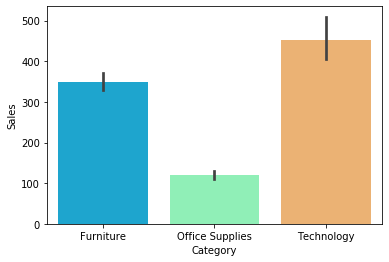

In [24]:
sns.barplot(x="Category", y="Sales", data=Store_data,palette='rainbow')

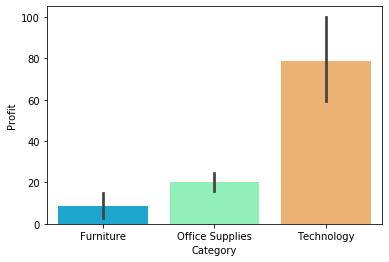

In [25]:
sns.barplot(x="Category", y="Profit", data=Store_data,palette='rainbow')

### Insights:
**office supplies has less sales and less profits and also furniture is good in sales but worst in profits** 

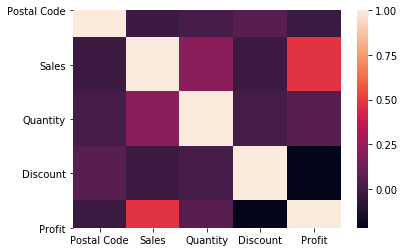

In [26]:
sns.heatmap(Store_data.corr())

<Figure size 1080x720 with 0 Axes>

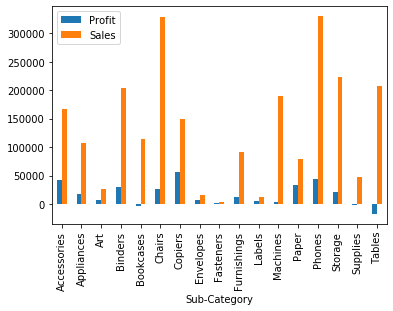

In [34]:
plt.figure(figsize=(15,10))
Store_data.groupby("Sub-Category")["Profit","Sales"].sum().plot.bar()

### Insights:
**In Tables category the Sales are high but The Profits are Negative**

In [28]:
city_data=Store_data.groupby("City")["Profit","Sales","Discount"].sum()

In [29]:
city_data.head()

,Profit,Sales,Discount
City,,,
Aberdeen,6.6300,25.500,0.0
Abilene,-3.7584,1.392,0.8
Akron,-186.6356,2729.986,7.5
Albuquerque,634.0881,2220.160,0.8
Alexandria,318.6183,5519.570,0.0


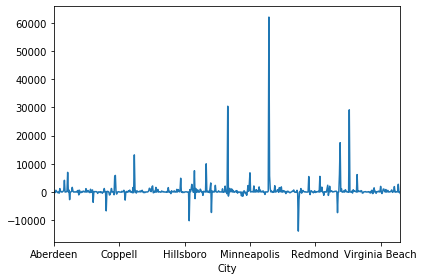

In [49]:
city_data["Profit"].plot()
plt.tight_layout()

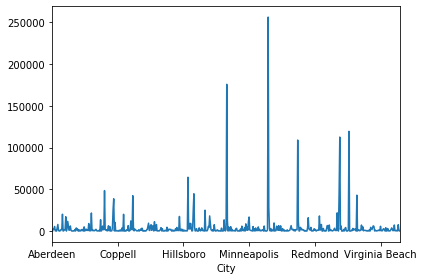

In [50]:
city_data["Sales"].plot()
plt.tight_layout()

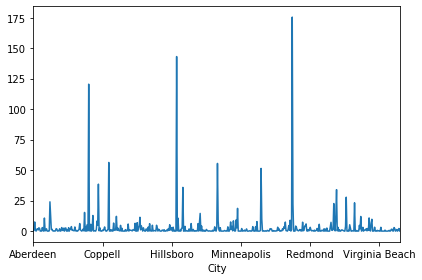

In [51]:
city_data["Discount"].plot()
plt.tight_layout()

In [30]:
city_data.describe()

,Profit,Sales,Discount
count,531.000000,531.000000,531.000000
mean,539.354090,4326.178645,2.939906
std,3676.603852,16957.514408,12.390862
min,-13837.767400,1.392000,0.000000
25%,4.176100,237.387000,0.000000
50%,73.352900,895.790000,0.400000
75%,346.774250,2655.923000,1.800000
max,62036.983700,256368.161000,175.500000


### Insights:
**After observing that the city where ww can provide more discounts lead to more losses**